In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Carregar os dados
satelite = pd.read_csv('/content/drive/My Drive/ML/INPE/satelite_18_23.csv')
estacoes = pd.read_csv('/content/drive/My Drive/ML/Kaggle/estacoes_resumida.csv')
print("Primeiras linhas da tabela de satélites:")
display(satelite.head())
# Dados unificados de estações meteorológicas
print("\nPrimeiras linhas da tabela de estações meteorológicas:")
display(estacoes.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeiras linhas da tabela de satélites:


,latitude,longitude,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp
0,-13.02000,-45.45000,2018-06-09 17:19:05,GOES-16,Brasil,BAHIA,SÃO DESIDÉRIO,Cerrado,53.0,0.0,1.0,0,NaN
1,-4.22000,-42.97000,2018-06-09 19:35:01,GOES-16,Brasil,PIAUÍ,MIGUEL ALVES,Cerrado,4.0,0.0,0.8,0,NaN
2,-4.24000,-42.97000,2018-06-09 19:35:01,GOES-16,Brasil,PIAUÍ,MIGUEL ALVES,Cerrado,4.0,0.0,0.9,0,NaN
3,-4.22762,-42.96528,2018-06-09 17:00:00,NPP-375,Brasil,PIAUÍ,MIGUEL ALVES,Cerrado,4.0,0.0,0.9,0,11.2
4,-4.15877,-43.00448,2018-06-09 17:00:00,NPP-375,Brasil,MARANHÃO,DUQUE BACELAR,Cerrado,4.0,0.0,0.5,0,3.8



Primeiras linhas da tabela de estações meteorológicas:


,Data,LATITUDE,LONGITUDE,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)","UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))",ESTACAO,UF
0,2018-01-01,-6.0,-43,0,28,73.0,",9",281.0,FLORIANO,PI
1,2018-01-01,-6.0,-43,0,"26,9",79.0,"1,2",296.0,FLORIANO,PI
2,2018-01-01,-6.0,-43,0,"26,6",79.0,",9",253.0,FLORIANO,PI
3,2018-01-01,-6.0,-43,0,"25,8",83.0,",2",277.0,FLORIANO,PI
4,2018-01-01,-6.0,-43,0,"25,5",85.0,",9",267.0,FLORIANO,PI


In [18]:
# Importando pandas
import pandas as pd
import numpy as np
satelite = pd.read_csv('/content/drive/My Drive/ML/INPE/satelite_18_23.csv')
estacoes = pd.read_csv('/content/drive/My Drive/ML/Kaggle/estacoes_resumida.csv')

# Correção de valores inválidos
decimal_columns = ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)','VENTO, VELOCIDADE HORARIA (m/s)']
for col in decimal_columns:
    estacoes[col] = pd.to_numeric(estacoes[col].replace(',', '.', regex=True), errors='coerce')

# Tabela Satélite
satelite = satelite.astype({
    'latitude': 'float',
    'longitude': 'float',
    'data_pas': 'datetime64[ns]',
    'numero_dias_sem_chuva': 'float',
    'precipitacao': 'float',
    'risco_fogo': 'float',
    'frp': 'float' })

# Tabela Estações Meteorológicas
estacoes = estacoes.astype({
    'LATITUDE': 'float','LONGITUDE': 'float','Data': 'datetime64[ns]',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'float',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'float',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'float',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'float'})
print("Tipos dos dados da tabela Satélite:\n", satelite.dtypes)
print("\nTipos dos dados da tabela Estações Meteorológicas:\n", estacoes.dtypes)

# Tabela Satélite
print("\nIntervalos da Tabela Satélite:")
for col in satelite.select_dtypes(include=['float', 'int']).columns:
    min_val, max_val = satelite[col].min(), satelite[col].max()
    print(f"{col}: Mínimo = {min_val}, Máximo = {max_val}")
print("\nEstatísticas adicionais da Tabela Satélite:")
print(satelite.describe())

# Tabela Estações Meteorológicas
print("\nIntervalos da Tabela Estações Meteorológicas:")
for col in estacoes.select_dtypes(include=['float', 'int']).columns:
    min_val, max_val = estacoes[col].min(), estacoes[col].max()
    print(f"{col}: Mínimo = {min_val}, Máximo = {max_val}")
print("\nEstatísticas adicionais da Tabela Estações Meteorológicas:")
print(estacoes.describe())

#tratamento da tabela Satélite
satelite = satelite[(satelite['latitude'].between(-12, -5)) & (satelite['latitude'].notna())]
satelite = satelite[(satelite['longitude'].between(-44, -34)) & (satelite['longitude'].notna())]
satelite = satelite[satelite['precipitacao'] >= 0]
satelite = satelite[satelite['risco_fogo'] >= 0]
satelite = satelite[satelite['numero_dias_sem_chuva'] >= 0]
satelite = satelite[satelite['data_pas'].notna()]
estado_mapping = {'BAHIA': 'BA','ALAGOAS': 'AL','CEARÁ': 'CE','MARANHÃO': 'MA',
    'PARAÍBA': 'PB','PERNAMBUCO': 'PE','RIO GRANDE DO NORTE': 'RN',
    'PIAUÍ': 'PI','SERGIPE': 'SE'}
satelite['estado'] = satelite['estado'].replace(estado_mapping)
satelite = satelite[satelite['estado'].notna()]
satelite = satelite.drop(columns=['municipio', 'pais', 'id_area_industrial'])
satelite.to_csv('/content/drive/My Drive/ML/INPE/satelite_tratados.csv', index=False)

#tratamento da tabela Estações
estacoes = estacoes[(estacoes['LATITUDE'].between(-12, -5)) & (estacoes['LATITUDE'].notna())]
estacoes = estacoes[(estacoes['LONGITUDE'].between(-44, -34)) & (estacoes['LONGITUDE'].notna())]
estacoes.rename(columns={'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'PRECIPITACAO'}, inplace=True)
estacoes = estacoes[estacoes['PRECIPITACAO'] >= 0]
estacoes = estacoes[estacoes['Data'].notna()]
estacoes.rename(columns={'VENTO, VELOCIDADE HORARIA (m/s)': 'VENTO_VELOCIDADE'}, inplace=True)
estacoes = estacoes[estacoes['VENTO_VELOCIDADE'] >= 0]
estacoes.rename(columns={'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'TEMPERATURA_AR'}, inplace=True)
estacoes = estacoes[estacoes['TEMPERATURA_AR'] >= 0]
estacoes.rename(columns={'UMIDADE RELATIVA DO AR, HORARIA (%)': 'UMIDADE_ar'}, inplace=True)
estacoes = estacoes[estacoes['UMIDADE_ar'] >= 0]
estacoes = estacoes.drop(columns=['VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'ESTACAO'])
estacoes = estacoes[estacoes['UF'].notna()]
estacoes.to_csv('/content/drive/My Drive/ML/Kaggle/estacoes_tratadas.csv', index=False)
print("Tabelas tratadas e salvas com sucesso!")


Tipos dos dados da tabela Satélite:
 latitude                        float64
longitude                       float64
data_pas                 datetime64[ns]
satelite                         object
pais                             object
estado                           object
municipio                        object
bioma                            object
numero_dias_sem_chuva           float64
precipitacao                    float64
risco_fogo                      float64
id_area_industrial                int64
frp                             float64
dtype: object

Tipos dos dados da tabela Estações Meteorológicas:
 Data                                            datetime64[ns]
LATITUDE                                               float64
LONGITUDE                                              float64
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           float64
UMIDADE RELATIVA DO AR, HORARIA (%)                    float6

<ipython-input-18-cebffeabb2c6>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estacoes.rename(columns={'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'PRECIPITACAO'}, inplace=True)
<ipython-input-18-cebffeabb2c6>:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estacoes.rename(columns={'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'TEMPERATURA_AR'}, inplace=True)


Tabelas tratadas e salvas com sucesso!


In [19]:
import pandas as pd
satelite_tratado = pd.read_csv('/content/drive/My Drive/ML/INPE/satelite_tratados.csv')
estacoes_tratado = pd.read_csv('/content/drive/My Drive/ML/Kaggle/estacoes_tratadas.csv')

# Renomear colunas semelhantes
estacoes_tratado.rename(columns={
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'PRECITACAO': 'precipitacao',
    'VENTO_VELOCIDADE': 'vento_velocidade',
    'TEMPERATURA_AR': 'temperatura',
    'UMIDADE_ar': 'umidade_ar',
    'Data': 'data'
}, inplace=True)

# Juntar as tabelas usando merge mantendo todas as colunas
merged_data = pd.merge(satelite_tratado, estacoes_tratado,
                       left_on=['latitude', 'longitude', 'data_pas'],
                       right_on=['latitude', 'longitude', 'data'],
                       how='outer')

# Juntar colunas
merged_data['precipitacao'] = merged_data['precipitacao'].combine_first(merged_data['PRECIPITACAO'])
merged_data['estado'] = merged_data['estado'].combine_first(merged_data['UF'])
merged_data['data'] = merged_data['data'].combine_first(merged_data['data_pas'])

merged_data.drop(columns=['PRECIPITACAO', 'UF', 'data_pas'], inplace=True)
merged_data.to_csv('/content/drive/My Drive/ML/tabela_join.csv', index=False)
print("\nPrimeiras linhas do DataFrame combinado:\n")
print(merged_data.head())
print("Tabelas unidas e salvas como 'tabelas_join.csv'")



Primeiras linhas do DataFrame combinado:

   latitude  longitude satelite estado    bioma  numero_dias_sem_chuva  \
0     -12.0     -43.77  GOES-16     BA  Cerrado                    8.0   
1     -12.0     -43.77  GOES-16     BA  Cerrado                    8.0   
2     -12.0     -43.77  GOES-16     BA  Cerrado                    8.0   
3     -12.0     -43.74  GOES-16     BA  Cerrado                    4.0   
4     -12.0     -43.74  GOES-16     BA  Cerrado                    8.0   

   precipitacao  risco_fogo  frp                 data  temperatura  \
0           0.0         1.0  NaN  2021-05-03 11:54:11          NaN   
1           0.0         1.0  NaN  2021-05-03 12:14:11          NaN   
2           0.0         1.0  NaN  2021-05-03 13:54:11          NaN   
3           0.0         1.0  NaN  2021-04-29 14:44:12          NaN   
4           0.0         1.0  NaN  2021-05-03 11:54:11          NaN   

   umidade_ar  vento_velocidade  
0         NaN               NaN  
1         NaN          

<ipython-input-26-7162292f82c3>:4: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabela_join = pd.read_csv('/content/drive/My Drive/ML/tabela_join.csv')


Dimensões da tabela 'tabela_join':
Linhas: 4644807, Colunas: 13
Resumo Estatístico:
           latitude     longitude  numero_dias_sem_chuva  precipitacao  \
count  4.644807e+06  4.644807e+06           1.899280e+06  4.644807e+06   
mean  -7.984009e+00 -3.994248e+01           3.875532e+01  1.524769e-01   
std    2.031239e+00  2.876152e+00           4.298700e+01  1.314763e+00   
min   -1.200000e+01 -4.400000e+01           0.000000e+00  0.000000e+00   
25%   -9.606000e+00 -4.284859e+01           6.000000e+00  0.000000e+00   
50%   -7.754180e+00 -4.000000e+01           2.000000e+01  0.000000e+00   
75%   -6.310000e+00 -3.781879e+01           6.700000e+01  0.000000e+00   
max   -5.000000e+00 -3.400000e+01           8.330000e+02  1.382000e+02   

         risco_fogo           frp   temperatura    umidade_ar  \
count  1.899280e+06  1.367170e+06  2.745527e+06  2.745527e+06   
mean   9.351210e-01  3.319410e+01  2.639268e+01  6.508976e+01   
std    1.955398e-01  7.779496e+01  4.290068e+00  2.169

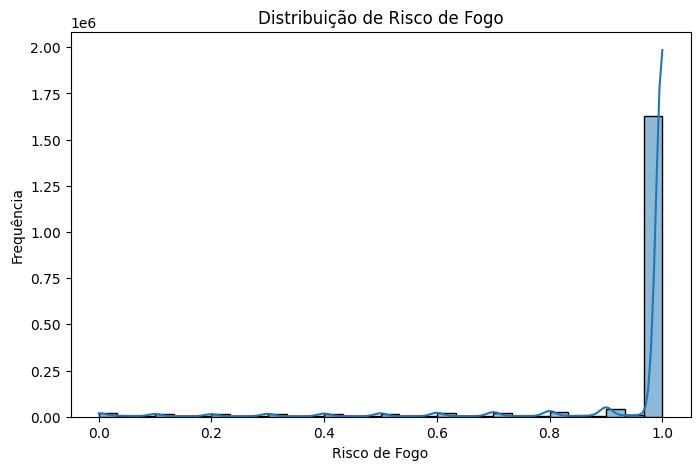

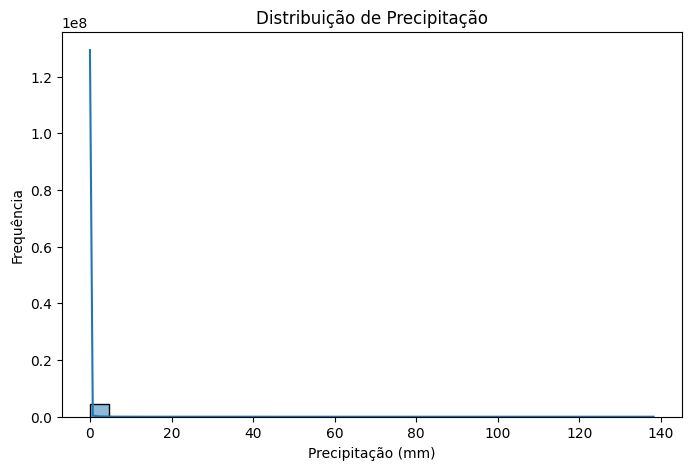

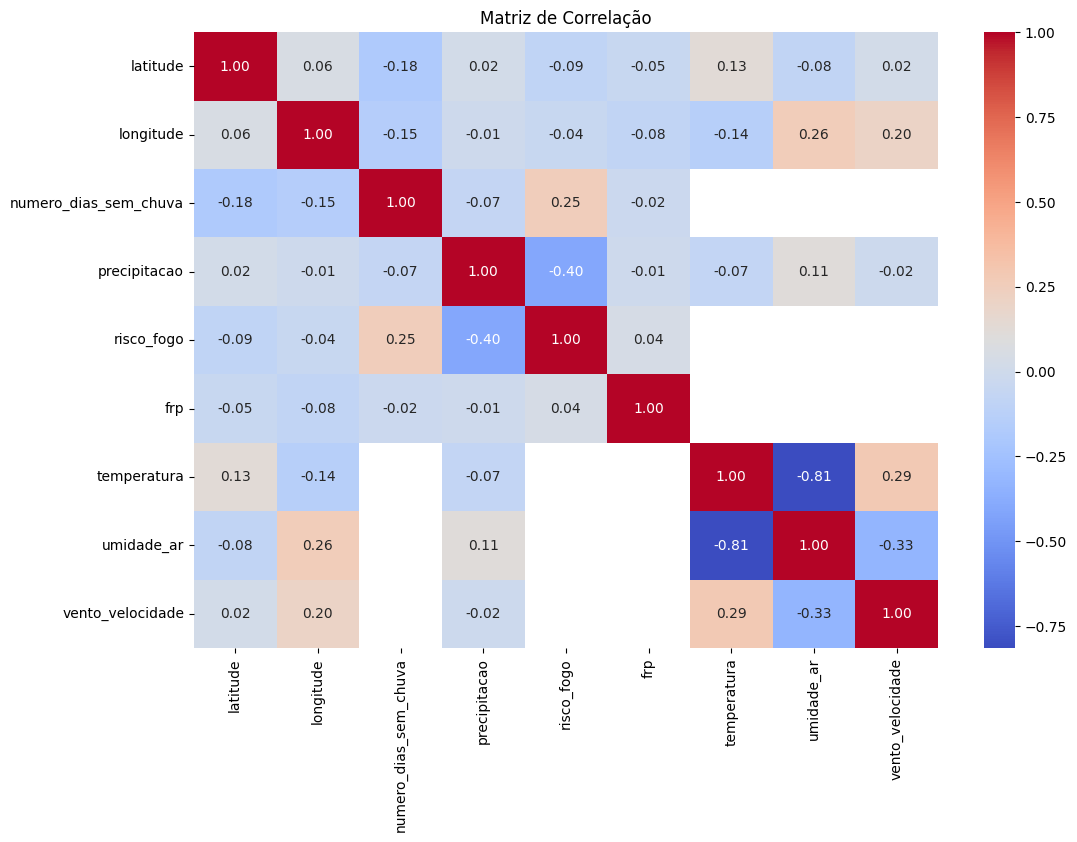

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1400x600 with 1 Axes>

In [26]:
import pandas as pd
tabela_join = pd.read_csv('/content/drive/My Drive/ML/tabela_join.csv')
print("Dimensões da tabela 'tabela_join':")
print(f"Linhas: {tabela_join.shape[0]}, Colunas: {tabela_join.shape[1]}")
print("Resumo Estatístico:")
print(tabela_join.describe())
print("\nDados Faltantes:")
print(tabela_join.isnull().sum())
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de 'risco_fogo'
plt.figure(figsize=(8, 5))
sns.histplot(tabela_join['risco_fogo'], bins=30, kde=True)
plt.title('Distribuição de Risco de Fogo')
plt.xlabel('Risco de Fogo')
plt.ylabel('Frequência')
plt.show()

# Distribuição de 'precipitacao'
plt.figure(figsize=(8, 5))
sns.histplot(tabela_join['precipitacao'], bins=30, kde=True)
plt.title('Distribuição de Precipitação')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Frequência')
plt.show()
# Matriz de correlação
numeric_columns = tabela_join.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()



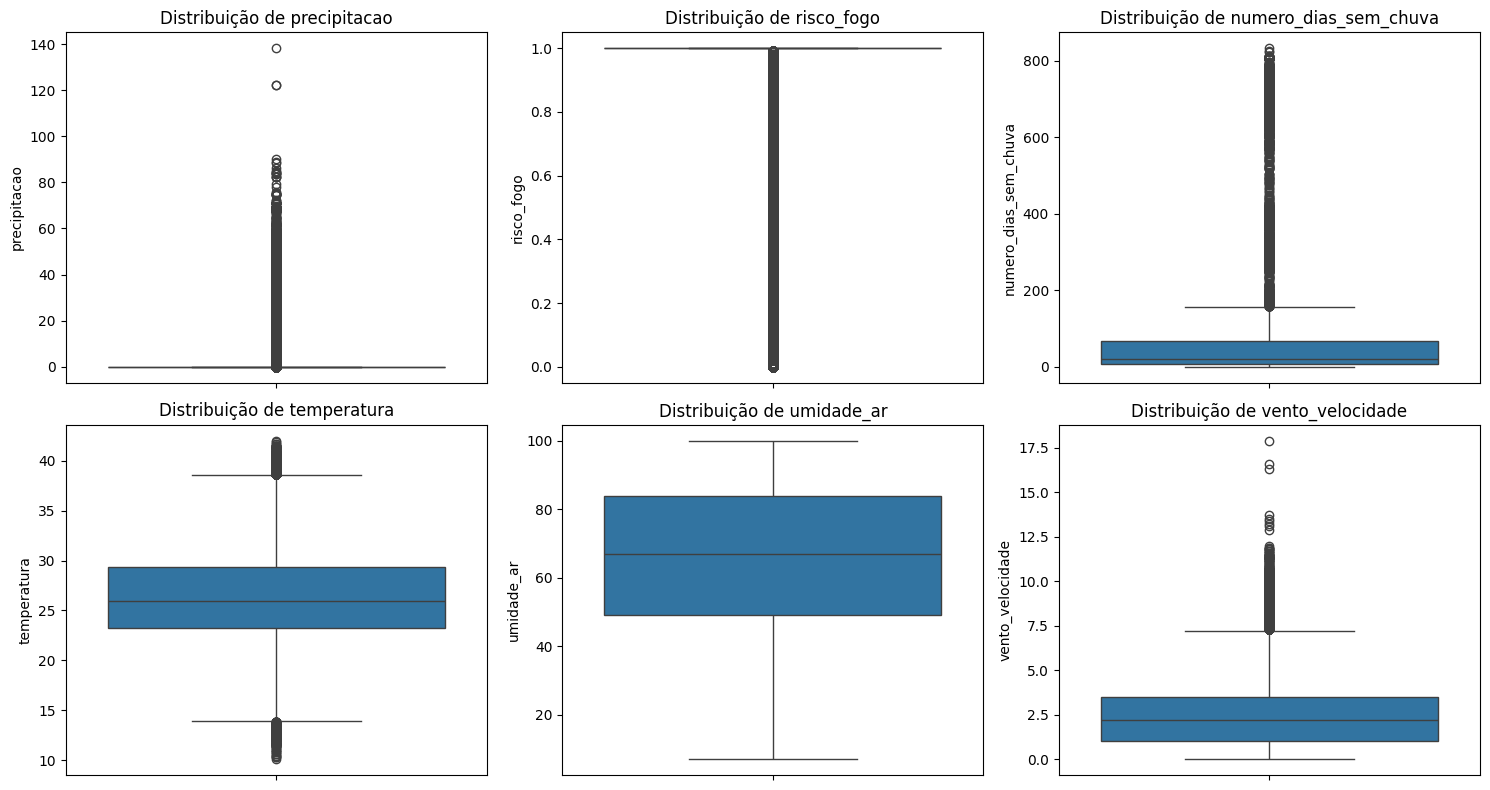

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Criar um boxplot
colunas_para_boxplot = ['precipitacao', 'risco_fogo', 'numero_dias_sem_chuva', 'temperatura', 'umidade_ar', 'vento_velocidade']
plt.figure(figsize=(15, 8))
for i, coluna in enumerate(colunas_para_boxplot, 1):
    plt.subplot(2, 3, i)  # Ajuste de layout: 2 linhas, 3 colunas
    sns.boxplot(data=tabela_join, y=coluna)
    plt.title(f'Distribuição de {coluna}')
    plt.ylabel(coluna)
plt.tight_layout()
plt.show()


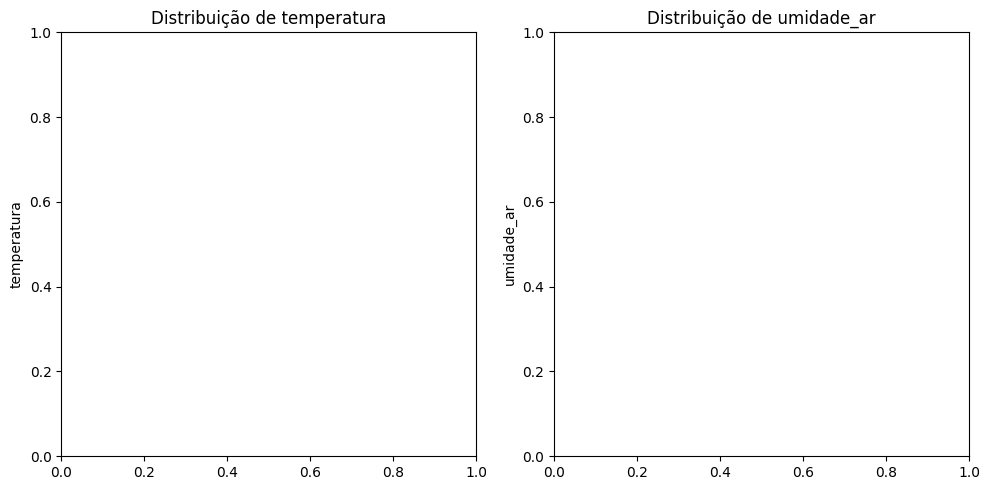

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criação de boxplot para cada coluna
colunas_para_boxplot = ['temperatura', 'umidade_ar']
plt.figure(figsize=(10, 5))
for i, coluna in enumerate(colunas_para_boxplot, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=tabela_join, y=coluna)
    plt.title(f'Distribuição de {coluna}')
    plt.ylabel(coluna)
plt.tight_layout()
plt.show()
